In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from collections import Counter

In [271]:
# read the data:

df_1 = pd.read_csv('../data/toddlers.csv')
df_1.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,post_hint,preview,removed_by_category,author_flair_template_id,author_flair_text_color,author_flair_background_color,banned_by,author_cakeday,thumbnail_height,thumbnail_width
0,[],False,lauraliegrace,NaN,[],NaN,text,t2_oc4xg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,comethobnob,NaN,[],NaN,text,t2_4u1vzsxy,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Goback2dreaming,NaN,[],NaN,text,t2_3kuan4ms,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,mamaleti,NaN,[],NaN,text,t2_o7ta4rma,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,ptkhisti,NaN,[],NaN,text,t2_krk5g2br,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
df_2 = pd.read_csv('../data/parents.csv')
df_2.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,whitelist_status,wls,removed_by_category,post_hint,preview,author_cakeday,author_flair_background_color,author_flair_template_id,author_flair_text_color,banned_by
0,[],False,throwmeawayplz19373,NaN,[],NaN,text,t2_mdgv2e7q,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,HireAFriendLLC,NaN,[],NaN,text,t2_hpu5amfc,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,komosawa,NaN,[],NaN,text,t2_5cp7w3qo,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,sherbshib,NaN,[],NaN,text,t2_aso8jmm8,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,fatcatdad66,NaN,[],NaN,text,t2_p5f58zbj,False,False,...,all_ads,6,automod_filtered,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
# Check the shapes: 

df_1.shape, df_2.shape

((2999, 75), (2996, 70))

In [318]:
# Check for null values: 

df_1.isnull().sum()

all_awardings                       0
allow_live_comments                 0
author                              0
author_flair_css_class           2992
author_flair_richtext               3
                                 ... 
author_flair_background_color    2999
banned_by                        2998
author_cakeday                   2991
thumbnail_height                 2993
thumbnail_width                  2993
Length: 75, dtype: int64

In [319]:
df_2.isnull().sum()

all_awardings                       0
allow_live_comments                 0
author                              0
author_flair_css_class           2996
author_flair_richtext               6
                                 ... 
author_cakeday                   2992
author_flair_background_color    2964
author_flair_template_id         2964
author_flair_text_color          2956
banned_by                        2990
Length: 70, dtype: int64

In [277]:
# Different amount of columns: 

set(df_1.columns)-set(df_2.columns)

{'crosspost_parent',
 'crosspost_parent_list',
 'thumbnail_height',
 'thumbnail_width',
 'url_overridden_by_dest'}

In [278]:
# Drop the columns that have a lot of zeros and that carry no particular information which can be used in theis project.
# We'll need the name of the subreddit, the title of the post, the actual text of the post, the author's name, time the post was created: 

toddlers = df_1[['subreddit', 'title', 'selftext', 'created_utc', 'author']]
toddlers.head()

,subreddit,title,selftext,created_utc,author
0,toddlers,3-year-old with constant nightmares,I’m looking for advice with how to help my dau...,1664511751,lauraliegrace
1,toddlers,Am I doing something wrong or is my son going ...,"So my son (3m) has always been with me, I used...",1664507973,comethobnob
2,toddlers,I feel like I'm falling my little daughter.,I'm a single mom of a 3 year old girl. I had a...,1664507151,Goback2dreaming
3,toddlers,How did you organize sleep hours once your tod...,"If your child is at Pre-K, how many hours of s...",1664506846,mamaleti
4,toddlers,2 yrs toddler’s repetitive movements. concerns ?,I think i am overthinking but not sure. Our 2 ...,1664506140,ptkhisti


In [279]:
parents = df_2[['subreddit', 'title', 'selftext', 'created_utc', 'author']]
parents.head()

,subreddit,title,selftext,created_utc,author
0,Parenting,My 11 year old was a product of rape. I am not...,The rape was when I was 18 with a guy I had be...,1664513977,throwmeawayplz19373
1,Parenting,My child’s teacher told us to take ivermectin,Please only respond if you’re pro science. I’m...,1664512319,HireAFriendLLC
2,Parenting,road trip with 15 month old,"Hi parents,\n\nHaving to take a five hour driv...",1664512127,komosawa
3,Parenting,Leaving my baby with my parents overnight once...,My baby has a sleepover at my mother’s house a...,1664511448,sherbshib
4,Parenting,Daughter rages when I mention anything to do w...,[removed],1664510381,fatcatdad66


In [280]:
# Check for empty posts in toddlers: 

toddlers['selftext'].isnull().sum()

131

In [281]:
toddlers[toddlers['selftext'].isnull()]

,subreddit,title,selftext,created_utc,author
14,toddlers,What hair products do you use for your child’s...,NaN,1664495943,luvdez
29,toddlers,toddler irritated and not eating?,NaN,1664478683,Lumpy_Scientist_5466
61,toddlers,I went to a business travel for 3 days and was...,NaN,1664413113,Upbeat_Network_9452
69,toddlers,Need to update our toddler book options. What ...,NaN,1664405185,steadyachiever
74,toddlers,begbugs at daycare?!,NaN,1664399638,ilovemyassholecat
...,...,...,...,...,...
2900,toddlers,Biting,NaN,1660153505,Living_Watercress
2907,toddlers,Weaning and eating,NaN,1660146170,cheddarchups
2941,toddlers,My 3yr old son can't sit through the circle ti...,NaN,1660092332,PastAside6327
2954,toddlers,Is anyone else guilty of skipping pages in a b...,NaN,1660079572,kwestwood186


In [282]:
# Drop these rows:

toddlers = toddlers[toddlers['selftext'].notnull()]

In [283]:
toddlers['selftext'].isnull().sum()

0

In [284]:
# Check for null values in toddlers:

toddlers.isnull().sum()

subreddit      0
title          0
selftext       0
created_utc    0
author         0
dtype: int64

In [285]:
# Check for empty posts in parents: 

parents['selftext'].isnull().sum()

6

In [286]:
# Drop these rows:

parents = parents[parents['selftext'].notnull()]

In [287]:
parents['selftext'].isnull().sum()

0

In [288]:
# Check for null values in parents:

parents.isnull().sum()

subreddit      0
title          0
selftext       0
created_utc    0
author         0
dtype: int64

In [289]:
# How many 'removed' posts do we have: 

toddlers[toddlers['selftext'] =='[removed]'].value_counts().sum()

110

In [290]:
parents[parents['selftext'] == '[removed]'].value_counts().sum()

582

In [291]:
parents[parents['author'] == '[deleted]'].value_counts().sum()

0

In [292]:
toddlers[toddlers['selftext'] =='[deleted]'].value_counts().sum()

2

In [293]:
toddlers[toddlers['author'] =='[deleted]'].value_counts().sum()

2

In [294]:
toddlers[toddlers['selftext'] =='[deleted]']

,subreddit,title,selftext,created_utc,author
819,toddlers,Help with sleep?,[deleted],1663238752,[deleted]
1483,toddlers,It got better,[deleted],1662254140,[deleted]


In [295]:
# Drop the rows in 'toddlers' and 'parents' that contain 'deleted' and 'removed' posts and authors:

toddlers = toddlers[(toddlers['selftext']!='[removed]') & (toddlers['selftext']!='[deleted]')]
parents = parents[parents['selftext'] != '[removed]']

In [296]:
# Check the shapes: 
print(toddlers.shape)
print(parents.shape)

(2756, 5)
(2408, 5)


In [297]:
# Number of unque users in toddlers and in parents:

print('unque users in toddlers:', len(pd.unique(toddlers['author'])))
print('unque users in parents:', len(pd.unique(parents['author'])))

unque users in toddlers: 2112
unque users in parents: 2212


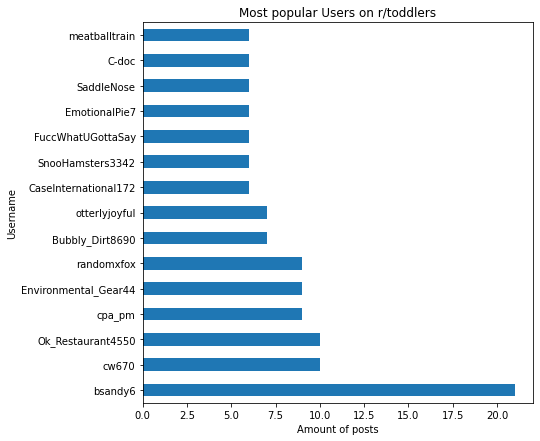

In [321]:
# 10 top users in toddlers: 

toddlers['author'].value_counts()[:15].plot.barh(figsize=(7,7), ylabel = 'Username', title = "Most popular Users on r/toddlers")
plt.xlabel("Amount of posts")
plt.savefig("../images/Most popular Users on toddlers.jpg");

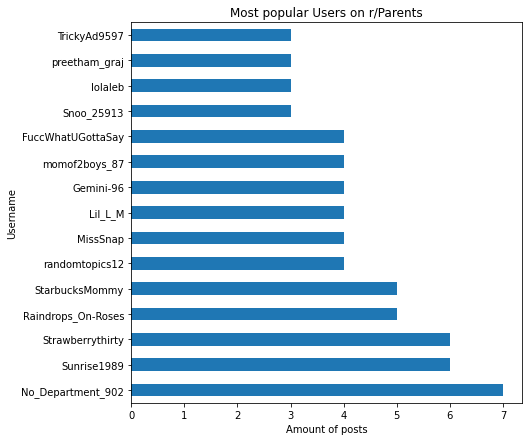

In [322]:
# 10 top users in parents: 

parents['author'].value_counts()[:15].plot.barh(figsize=(7,7), ylabel = 'Username', title = "Most popular Users on r/Parents")
plt.xlabel("Amount of posts")
plt.savefig("../images/Most popular Users on parents.jpg");

In [300]:
# Let's see if there are people who posted in both reddits: 

toddlers.author.isin(parents.author).value_counts()

False    2604
True      152
Name: author, dtype: int64

In [301]:
# Let's see their names: 

df3 = pd.DataFrame(toddlers[toddlers.author.isin(parents.author)]['author'].value_counts())
df3.head()

,author
bsandy6,21
randomxfox,9
otterlyjoyful,7
CaseInternational172,6
FuccWhatUGottaSay,6


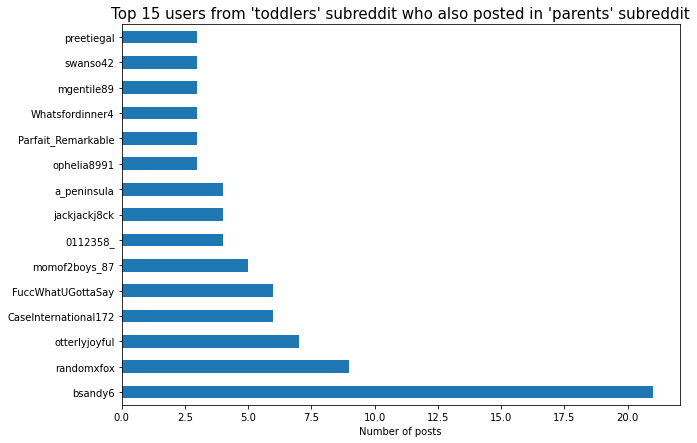

In [302]:
# Plot them and see how many posts they've written

plt.figure(figsize = (10, 7))
toddlers[toddlers.author.isin(parents.author)]['author'].value_counts()[:15].plot.barh()
plt.xlabel('Number of posts')
plt.title("Top 15 users from 'toddlers' subreddit who also posted in 'parents' subreddit", fontsize =15)
plt.savefig("../images/users from toddlers in parents.jpg");

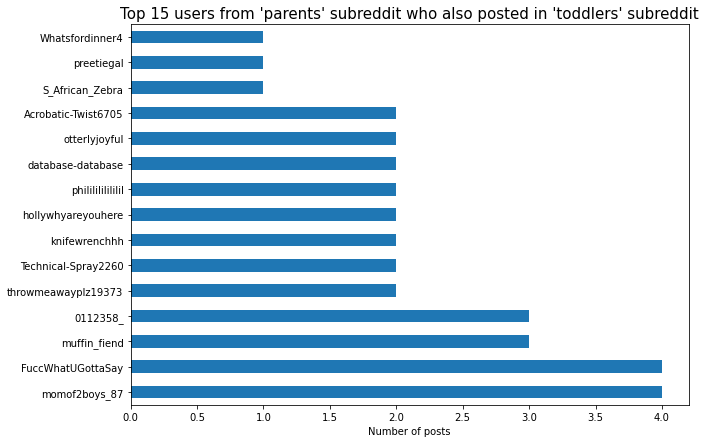

In [303]:
plt.figure(figsize = (10, 7))
parents[parents.author.isin(toddlers.author)]['author'].value_counts()[:15].plot.barh()
plt.xlabel('Number of posts')
plt.title("Top 15 users from 'parents' subreddit who also posted in 'toddlers' subreddit", fontsize =15)
plt.savefig("../images/users from parents in toddlers.jpg");

In [304]:
# list them:
parents[parents.author.isin(toddlers.author)]['author'].value_counts()

momof2boys_87          4
FuccWhatUGottaSay      4
muffin_fiend           3
0112358_               3
throwmeawayplz19373    2
                      ..
EOSC47                 1
sinsofasaint257        1
countingsheep1234      1
sp00ky_queen95         1
realhuman8762          1
Name: author, Length: 67, dtype: int64

In [305]:
# Check the presence of most popular user from 'parents' in 'toddlers':
toddlers[toddlers['author'] =='momof2boys_87']

,subreddit,title,selftext,created_utc,author
21,toddlers,When do they outgrow throwing?,My son turned 2 in august and he’s always been...,1664485046,momof2boys_87
1168,toddlers,25 month old hardly sleeps anymore,"He’s either up super early in the morning, or ...",1662718938,momof2boys_87
1595,toddlers,Do you cap your toddlers naps &gt;2 hours?,My son just turned 2 and has been sleeping hor...,1662115268,momof2boys_87
1680,toddlers,24 month old doesn’t want to eat meals,My son was always such a good eater until the ...,1661986728,momof2boys_87
1706,toddlers,Fun activities/crafts for 24 month old,Does anyone have any fun activities or crafts ...,1661951361,momof2boys_87


In [306]:
parents[parents['author'] == 'momof2boys_87']

,subreddit,title,selftext,created_utc,author
96,Parenting,Miserable 2 year old,My son has never been an easy baby/toddler and...,1664458520,momof2boys_87
1335,Parenting,How to reconnect with spouse,Hi all.. looking for some advice on how to rec...,1663773149,momof2boys_87
2158,Parenting,25 month old has HFMD,"Symptoms started Saturday, rash appeared Tuesd...",1663348729,momof2boys_87
2469,Parenting,Need advice on 11 year old son,I share 50/50 custody of my son. He has never ...,1663182910,momof2boys_87


In [307]:
# If most popular author of toddlers is in parents:

parents[parents['author'] == 'bsandy6']

,subreddit,title,selftext,created_utc,author
2959,Parenting,Am I letting my son get addicted to music?,My son is 2 years old and he loves Encanto/Coc...,1662933560,bsandy6


In [308]:
# Create a colunm with the length of the post (taken from lab 5.02)

toddlers['post_length'] = toddlers['selftext'].str.len()
parents['post_length'] = parents['selftext'].str.len()

In [309]:
# Create a colunm with the word count: 

toddlers['post_word_count'] = toddlers['selftext'].str.split().apply(len)
parents['post_word_count'] = parents['selftext'].str.split().apply(len)

In [310]:
toddlers.head()

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
0,toddlers,3-year-old with constant nightmares,I’m looking for advice with how to help my dau...,1664511751,lauraliegrace,1295,240
1,toddlers,Am I doing something wrong or is my son going ...,"So my son (3m) has always been with me, I used...",1664507973,comethobnob,1940,395
2,toddlers,I feel like I'm falling my little daughter.,I'm a single mom of a 3 year old girl. I had a...,1664507151,Goback2dreaming,2778,529
3,toddlers,How did you organize sleep hours once your tod...,"If your child is at Pre-K, how many hours of s...",1664506846,mamaleti,875,170
4,toddlers,2 yrs toddler’s repetitive movements. concerns ?,I think i am overthinking but not sure. Our 2 ...,1664506140,ptkhisti,917,173


In [311]:
parents.head()

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
0,Parenting,My 11 year old was a product of rape. I am not...,The rape was when I was 18 with a guy I had be...,1664513977,throwmeawayplz19373,4304,849
1,Parenting,My child’s teacher told us to take ivermectin,Please only respond if you’re pro science. I’m...,1664512319,HireAFriendLLC,979,183
2,Parenting,road trip with 15 month old,"Hi parents,\n\nHaving to take a five hour driv...",1664512127,komosawa,249,49
3,Parenting,Leaving my baby with my parents overnight once...,My baby has a sleepover at my mother’s house a...,1664511448,sherbshib,400,86
5,Parenting,If you could give your past self any advise to...,I’m due with my second child mid November. My ...,1664509978,t_duddits,255,51


<Figure size 720x720 with 0 Axes>

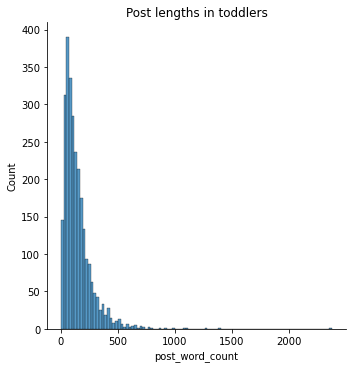

In [323]:
# distributions of post lengths:
plt.figure(figsize=(10,10))
sns.displot(toddlers['post_word_count'], kind = 'hist', bins = 100);
plt.title('Post lengths in toddlers');

In [324]:
# Did someone write a post longer than 2000 words??? Who's got time for that? Who's going to read it? 

toddlers[toddlers['post_word_count']>1300]

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
22,toddlers,My parents have no control over my kids,"**Short version:** My parents (60F and 60M), w...",1664485025,Cathode335,7157,1396
428,toddlers,"I've been working with toddlers for ten years,...",**Disclaimer:** This is a long read. \n\nI've ...,1663863289,PUSClFER,13702,2380


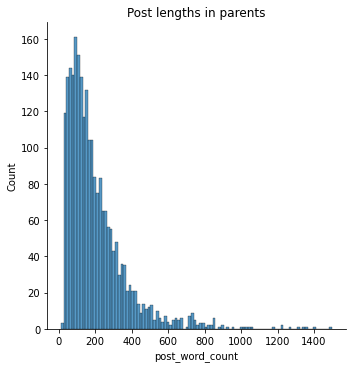

In [325]:
sns.displot(parents['post_word_count'], kind = 'hist', bins = 100)
plt.title('Post lengths in parents');

In [47]:
parents['post_word_count'].value_counts()

100     17
78      17
76      17
129     16
37      16
        ..
555      1
678      1
1407     1
1029     1
380      1
Name: post_word_count, Length: 532, dtype: int64

In [48]:
# Shortest statuses (from: https://datascientyst.com/get-top-10-highest-lowest-values-pandas/):

parents.nsmallest(5, ['post_word_count'])

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
2587,Parenting,"Walk, then sit to calm crying baby",Walk then sit: A scientific recipe that helps ...,1663118829,Antares284,164,12
2030,Parenting,Authorities failures of care against autistic ...,UK authorities failures of care around autisti...,1663419736,IndividualRow9880,150,20
1787,Parenting,Bottle feeding,Hello! Tell me your must have accessories for ...,1663534572,LogicalAssignment5,175,26
744,Parenting,Shared calendar app?,I need recommendations on a good calendar shar...,1664083461,BrittMac19,166,27
1320,Parenting,What 21st century things or services that help...,For example i can see several podcasts about s...,1663779355,winnethepoohhh,159,27


In [49]:
toddlers.nsmallest(5, ['post_word_count'])

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
1276,toddlers,can anyone suggest a forehead thermometer or a...,TIA!,1662551577,omgmlc,4,1
2640,toddlers,This youtube and podcast fairytales show is gr...,[https://www.youtube.com/watch?v=Qmrp2j-B1mE](...,1660578454,Pod-Producer,90,1
2990,toddlers,Please help my daughter for 2nd chance to be h...,https://www.gofundme.com/f/life-saving-kidney...,1660039762,Htooneeded,171,1
269,toddlers,How many tantrums a day does your toddler thro...,"Molars, man....",1664082346,Jon_Henderson_Music,15,2
486,toddlers,"They sell outlet protector plugs, but what do ...",Help me,1663797547,urdumidjiot,7,2


In [104]:
# Lets deal with these outliers: 

toddlers = toddlers.loc[(toddlers['post_word_count']< 350)& (toddlers['post_word_count']>20)]
toddlers.head()

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
0,toddlers,3-year-old with constant nightmares,I’m looking for advice with how to help my dau...,1664511751,lauraliegrace,1295,240
3,toddlers,How did you organize sleep hours once your tod...,"If your child is at Pre-K, how many hours of s...",1664506846,mamaleti,875,170
4,toddlers,2 yrs toddler’s repetitive movements. concerns ?,I think i am overthinking but not sure. Our 2 ...,1664506140,ptkhisti,917,173
5,toddlers,"Sometimes I lose my cool, how badly will this ...",My husband will sometimes snap too. It’s not o...,1664503385,ughidcwhatitis,1128,222
6,toddlers,"""momma can I have a bowl of popcorn, warm milk...",Yes. Yes yes yes my sweet child you can. Thank...,1664503064,eighteightfivesix,157,31


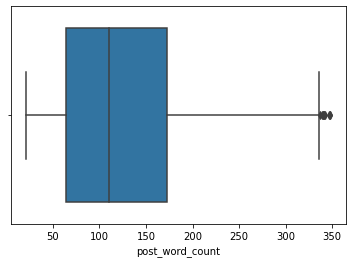

In [106]:
ax = sns.boxplot(x=toddlers['post_word_count'])

In [107]:
toddlers.nsmallest(5, ['post_word_count'])

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
400,toddlers,Taking a poll: about how many times a week doe...,Particularly curious 2 under…trying gauge what...,1663892470,cali_grown22,124,21
1459,toddlers,what is 2T/2A in toddler clothes?,My mother bought daughter nephew Halloween out...,1662296600,Lucid-Sun,114,21
1975,toddlers,Today I said I'm heartbroken as a joke to her ...,My 2 year old got really sad started touching ...,1661523415,maternityquestion,106,21
152,toddlers,What clean products do you use for your toddle...,My twins 14 months old. Looking recommendation...,1664283594,italianbeautyx0,138,22
548,toddlers,Toddler doesn’t listen,Kid almost 3. Doesn’t listen ANYTHING. Resists...,1663716714,jdrinks123,137,22


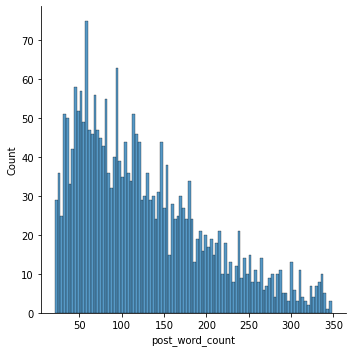

In [108]:
sns.displot(toddlers['post_word_count'], kind = 'hist', bins = 100);

In [109]:
# Now lets remove poutliers from "parents":

parents = parents.loc[(parents['post_word_count']< 500)& (parents['post_word_count']>20)]
parents.head()

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
1,Parenting,My child’s teacher told us to take ivermectin,Please only respond if you’re pro science. I’m...,1664512319,HireAFriendLLC,979,183
2,Parenting,road trip with 15 month old,"Hi parents,\n\nHaving to take a five hour driv...",1664512127,komosawa,249,49
3,Parenting,Leaving my baby with my parents overnight once...,My baby has a sleepover at my mother’s house a...,1664511448,sherbshib,400,86
5,Parenting,If you could give your past self any advise to...,I’m due with my second child mid November. My ...,1664509978,t_duddits,255,51
6,Parenting,Is there something wrong with him?,Friends baby (16month)\n\nHe’s obsessed with c...,1664508114,basillavender,590,118


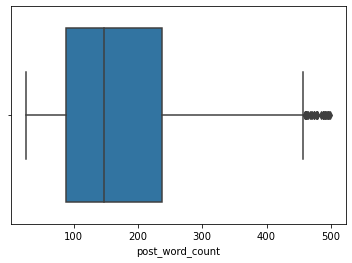

In [110]:
ax = sns.boxplot(x=parents['post_word_count'])

In [111]:
len(toddlers['author']) - len(parents['author'])

190

In [112]:
parents.nsmallest(5, ['post_word_count'])

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
1787,Parenting,Bottle feeding,Hello! Tell me your must have accessories for ...,1663534572,LogicalAssignment5,175,26
744,Parenting,Shared calendar app?,I need recommendations on a good calendar shar...,1664083461,BrittMac19,166,27
1320,Parenting,What 21st century things or services that help...,For example i can see several podcasts about s...,1663779355,winnethepoohhh,159,27
408,Parenting,'Yoga',That awkward moment you have to teach your tod...,1664257419,kawi_d,155,28
547,Parenting,What is the right age to introduce your child ...,"I’ve seen so many parents, they keep their chi...",1664207752,Sense_desiguy,163,28


---

In [121]:
# Combine these two subreddits together:

data = pd.concat([toddlers, parents], axis = 0, ignore_index=False)
data.head()

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
0,toddlers,3-year-old with constant nightmares,I’m looking advice help daughter. She never go...,1664511751,lauraliegrace,1295,240
3,toddlers,How did you organize sleep hours once your tod...,"If child Pre-K, many hours sleep get per night...",1664506846,mamaleti,875,170
4,toddlers,2 yrs toddler’s repetitive movements. concerns ?,I think overthinking sure. Our 2 yrs 2 months ...,1664506140,ptkhisti,917,173
5,toddlers,"Sometimes I lose my cool, how badly will this ...",My husband sometimes snap too. It’s often. Lik...,1664503385,ughidcwhatitis,1128,222
6,toddlers,"""momma can I have a bowl of popcorn, warm milk...",Yes. Yes yes yes sweet child can. Thankful won...,1664503064,eighteightfivesix,157,31


In [122]:
data.shape

(4734, 7)

In [123]:
# See if there are duplicate posts that came from toddlers and parents: 

duplicate = data[data.duplicated(['selftext'], keep=False)]
duplicate

,subreddit,title,selftext,created_utc,author,post_length,post_word_count
138,toddlers,How are absence seizures diagnosed?,"TW: seizures A months ago, toddler toilet eyes...",1664301830,TaTa0830,1428,270
139,toddlers,How are absence seizures diagnosed?,"TW: seizures A months ago, toddler toilet eyes...",1664301711,TaTa0830,1428,270
288,toddlers,Sandbox fun?,Hi Parents Who Have Gone Before Me… I 2 little...,1664060764,SanFranPeach,439,88
289,toddlers,Sandbox fun?,Hi Parents Who Have Gone Before Me… I 2 little...,1664060705,SanFranPeach,439,88
290,toddlers,Sandbox?,Hi Parents Who Have Gone Before Me… I 2 little...,1664060448,PositiveJust,439,88
1531,toddlers,My baby not so happy to see me in the morning ...,"I don’t know kind phase 18 mo going through, l...",1662186951,i-am-tk,949,182
1554,toddlers,Wish my baby would be happy to see me in the m...,"I don’t know kind phase 18 mo going through, l...",1662156791,i-am-tk,949,182
2653,toddlers,"""mommy, what do you need to be happy?""",My 2.5 year old daughter asked today witnessin...,1660561048,kathar7,552,106
2654,toddlers,"""Mommy, what do you need to be happy?""",My 2.5 year old daughter asked today witnessin...,1660560586,kathar314,552,106
301,Parenting,Wednesday Megathread - Ask Parents Anything - ...,This weekly thread is a good landing place for...,1664323210,AutoModerator,394,55


In [118]:
# drop those duplicated posts (keep just one):

data = data.drop_duplicates('selftext', keep='last')

---

In [137]:
# I'd like to do some exploratory analysis on subreddit posts separately. 
# So I'm going to clean the text from the slang words (Graham Waters's idea): 
slang_dict = {
    ' tho ': ' though ',
    'thru': ' through ',
    'thx': ' thanks ',
    ' ppl ': ' people ',
    ' tmi ': ' too much information ',
    ' idk ': ' i do not know ',
    ' idc ': ' i do not care ',
    ' id ': ' i would ',
    ' imo ': ' in my opinion ',
    ' imho ': ' in my humble opinion ',
    ' tbh ': ' to be honest ',
    ' tbf ': ' to be fair ',
    ' tb ': ' text back ',
    ' bc ': ' because ',
    ' b/c ': ' because ',
    ' cuz ': ' because '
}

# replace all slang in the selftext column
for key, value in slang_dict.items():
    data['selftext'] = data['selftext'].apply(lambda x: re.sub(key, value, x))

In [138]:
# Fuction to remove emoji (taken from: https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis/notebook): 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [139]:
data['selftext'] = data['selftext'].apply(remove_emoji)

In [140]:
# Function to clean text (https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis/notebook):

def clean_text(text):
    text = text.lower() # make text lower case
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove links
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('[^\w\s]','', text) # remove punctuation
    text = re.sub('\n', ' ', text) # remove new line
    text = re.sub('\w*\d\w*', '', text) #remove words with digits and digits
    text = re.sub(' +', ' ', text) #remove exptra spaces
    text = re.sub('\s*\\b([a-z]|[a-z]{2})\\b', '', text) # remove single letters
    return text

In [210]:
toddlers['selftext'] = toddlers['selftext'].apply(clean_text)
parents['selftext'] = parents['selftext'].apply(clean_text)
data['selftext'] = data['selftext'].apply(clean_text)

In [211]:
# Since I'd like to do some exploratory analysis on the words, I'd remove the stop words now:
# define the stop words:
stop_words = stopwords.words('english')
type(stop_words)

list

In [235]:
# Create a new list of words that are often in the toddlers and parents subbredits and add them to a list of stop_words:

newStopWords = ['child', 'children', 'toddler','toddlers', 'parents', 'parent', 'ppl', 'yrs', 'years',' u ', ' ur ',' yr ',' r ',' b ', 'son','daughter', 'month','months','old','year', 
                'school', 'daycare', 'kid', 'kids','dont', 'doesnt', 'ive','hes', 'shes', 'baby', 'wouldnt', 'would', 'cant', 'like', 'time', 'get', 'one', 'know', 'day', 'want', 'really', 
               'also', 'even', 'feel', 'boy','girl', 'weve', 'well', 'potty']
stop_words.extend(newStopWords)

In [241]:
# Remove the stopwords from my dataframes (https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe):

data['selftext'] = data['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
toddlers['selftext'] = toddlers['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
parents['selftext'] = parents['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [237]:
# Print out and plot most common words in 'toddlers':

p = Counter(" ".join(toddlers['selftext']).split()).most_common(30)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

         Word  Frequency
0       sleep        597
1      anyone        548
2         bed        530
3       going        522
4        back        510
5      little        506
6       night        492
7        help        474
8        much        474
9        home        462
10      still        460
11     around        452
12  something        431
13       week        410
14    started        408
15     things        399
16     always        393
17    getting        391
18       days        386
19      think        379
20      every        372
21        put        364
22      since        362
23        try        361
24      tried        360
25       good        358
26       take        358
27        say        357
28        got        356
29       play        356


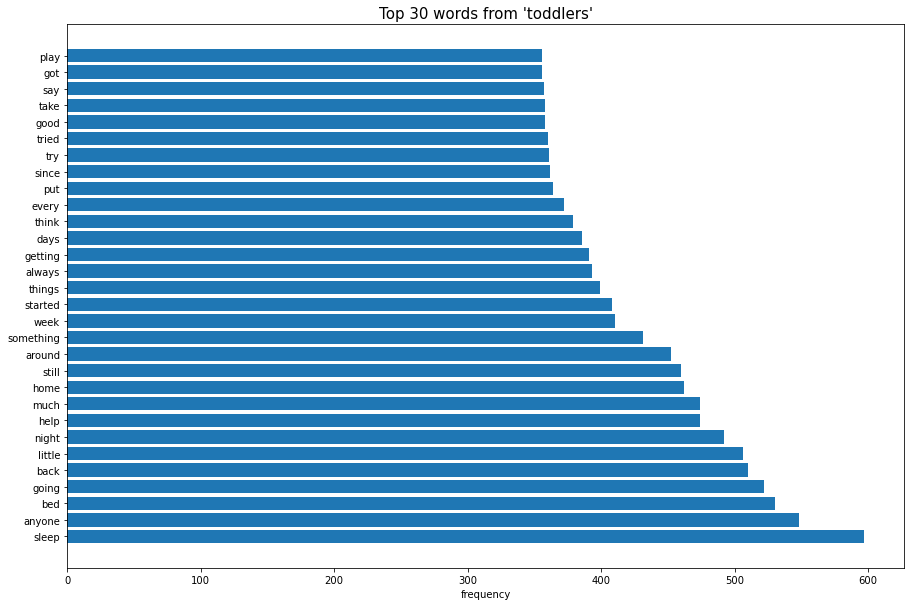

In [315]:
plt.figure(figsize = (15, 10))
plt.barh(rslt['Word'], rslt['Frequency'])
plt.xlabel('frequency')
plt.title("Top 30 words from 'toddlers'", fontsize =15)
plt.savefig("../images/top words in toddlers.jpg");

In [239]:
# Print out and plot most common words in 'parents':

par = Counter(" ".join(parents['selftext']).split()).most_common(30)
rslt_p = pd.DataFrame(par, columns=['Word', 'Frequency'])
print(rslt_p)

         Word  Frequency
0        home        691
1       going        679
2      things        633
3        back        624
4        said        620
5        help        592
6        much        572
7   something        565
8       think        555
9        work        545
10      first        543
11      sleep        531
12      still        530
13     always        525
14      never        513
15        got        510
16        mom        506
17       need        484
18        way        478
19      every        476
20    husband        475
21     little        475
22       make        463
23       told        460
24      since        459
25     around        457
26       good        451
27       take        443
28     advice        438
29      night        438


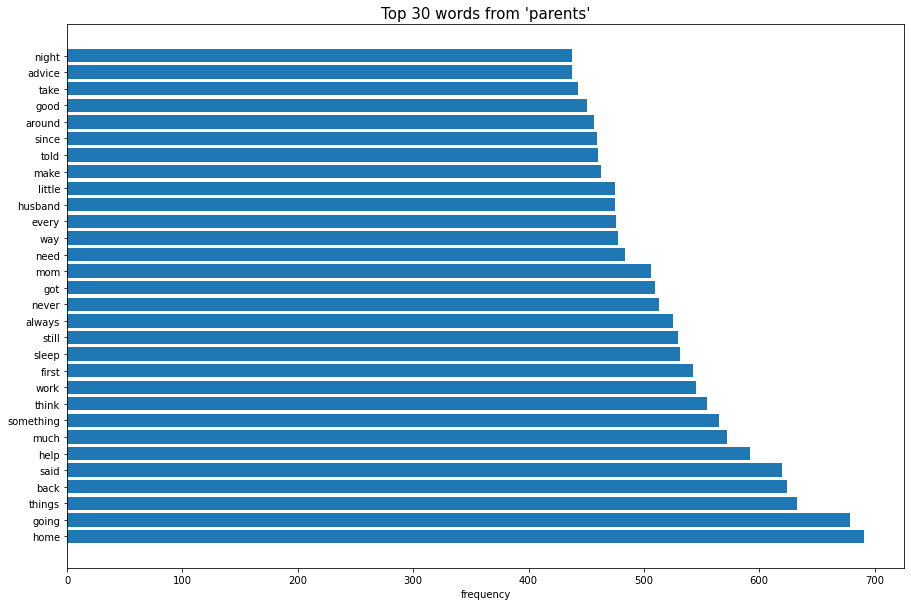

In [316]:
plt.figure(figsize = (15, 10))
plt.barh(rslt_p['Word'], rslt_p['Frequency'])
plt.xlabel('frequency')
plt.title("Top 30 words from 'parents'", fontsize =15)
plt.savefig("../images/top words in parents.jpg");

---

In [224]:
data['subreddit'] = data['subreddit'].map({'toddlers': 1, 'Parenting': 0})

In [225]:
# save the new 'toddlers' and 'parents' data (clean) as well as the merged dataframe:

data.to_csv('../data/toddlers_and_parents.csv', index = False)
toddlers.to_csv('../data/toddlers_clean.csv', index = False)
parents.to_csv('../data/parents_clean.csv', index = False)

---